In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import os
from tqdm import tqdm


import data_funcs.helper_module as hm

In [2]:
# dataset = np.zeros((1,256,256))


# directory = 'data_2021'
 
# # iterate over files in
# # that directory


# for filename in tqdm(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     if os.path.isfile(f):
#         arr = np.load(f)
#         dataset = np.append(dataset, arr, axis = 0)

# dataset = dataset[1:,:,:]
# np.save("2021.npy",dataset)

In [3]:
# dataset_2022 = np.zeros((1,256,256))


# directory = 'data_2022'
 
# # iterate over files in
# # that directory


# for filename in tqdm(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     if os.path.isfile(f):
#         arr = np.load(f)
#         dataset_2022 = np.append(dataset_2022, arr, axis = 0)

# dataset = dataset_2022[1:,:,:]
# np.save("2022.npy",dataset_2022)

In [4]:
full_dataset = np.load("2021_2022.npy")
full_dataset = full_dataset[1:,:,:]

sample_size = 10000
random_sample_idx = np.random.randint(low = 0, high = full_dataset.shape[0], size = sample_size)


random_smp_dataset = np.zeros((sample_size,256,256))

for i in tqdm(range(sample_size)):
    random_smp_dataset[i,:,:] = full_dataset[random_sample_idx[i],:,:]
    

100%|██████████| 10000/10000 [00:12<00:00, 799.67it/s]


In [5]:

nan_frames = 0
max_val = 0
extreme_treshold = 150
lower_treshold = 10

dataset_mid_prec = np.zeros_like(random_smp_dataset)

numb_of_frames_below_tresh = 0 

for fr in tqdm(range(random_smp_dataset.shape[0])):
    frame = random_smp_dataset[fr,:,:]
    frame_max = np.max(frame)
    if frame_max < extreme_treshold:
        if np.sum(frame) > lower_treshold:
            numb_of_frames_below_tresh +=1
    
    
    
    
    # frame = dataset[fr,:,:]
    # frame = frame.round(decimals=1)
    
    
    # if frame_max > max_val:
    #     print(f"New max! {frame_max=}")
    #     max_val = frame_max
    # if frame_max < treshhold:    
    #     dataset_mid_prec[fr,:,:] = frame
        
    # if np.isnan(frame):
    #     nan_frames +=1


# dataset_transformed = np.zeros((dataset.shape[0]-nan_frames, dataset.shape[1], dataset.shape[2]))
# sum_arr = np.zeros(dataset_transformed.shape[0])


# for fr in tqdm(range(dataset.shape[0])):
    
#     frame = dataset[fr,:,:]
#     #Log normalize: 

#     if np.isnan(fr_sum):
#         sum_arr[fr] = False
#     else:    
#         frame = log_transform(frame)
#         fr_sum = np.sum(frame)
#         dataset_transformed[fr,:,:] = frame
#         sum_arr[fr] = fr_sum
        
        
# numb_nan_frames = np.size(sum_arr) - np.count_nonzero(sum_arr)


100%|██████████| 10000/10000 [00:10<00:00, 989.67it/s]


In [6]:
dataset_tresh = np.zeros((numb_of_frames_below_tresh, 256,256))
trsh_idx = 0 

max_vals = []

for fr in tqdm(range(random_smp_dataset.shape[0])):
    frame = random_smp_dataset[fr,:,:]
    frame_max = np.max(frame)
    if frame_max < extreme_treshold:
        
        if np.sum(frame) >lower_treshold:
            max_vals.append(frame_max)
            dataset_tresh[trsh_idx,:,:] = frame
            trsh_idx += 1    
        

# sum_arr = np.zeros(dataset_tresh.shape[0])
# for fr in range(dataset_tresh.shape[0]):
#     sum_arr[fr] = np.sum()
print(f"{dataset_tresh.shape=}")
max_prec = np.max(dataset_tresh)
print(max(max_vals))

100%|██████████| 10000/10000 [00:05<00:00, 1954.08it/s]


dataset_tresh.shape=(9803, 256, 256)
148.5592041015625


dataset_tresh[0,:,:].shape=(256, 256)


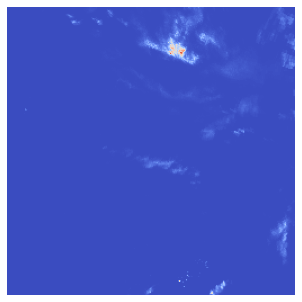

In [7]:
print(f"{dataset_tresh[0,:,:].shape=}")

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)


ax.imshow(dataset_tresh[0,:,:], cmap = "coolwarm")
# plt.savefig("0_heavy_prec.jpg")


### Transform data:

In [8]:
dataset_tranfs = hm.log_transform_4_power(dataset_tresh)



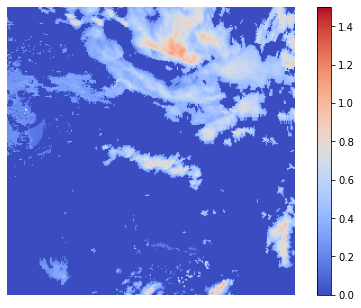

In [31]:

def plot_frame(frame:np.ndarray):
    max_prec_val = np.amax(dataset_tranfs)
    
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)


    im = ax.imshow(frame, cmap = "coolwarm", vmin = 0, vmax = max_prec_val)
    #fig.colorbar(im)
    fig.savefig(f"2random_samples.jpg",format="jpg",transparent=True, bbox_inches="tight", pad_inches = 0.0)
        
plot_frame(dataset_tranfs[0,:,:])

In [ ]:
hm.find_plot_max_prec_frame(dataset_tranfs)

In [34]:
from PIL import Image
def save_dataset_to_jpg_folder(dataset:np.ndarray, path:str):
    max_prec_val = np.amax(dataset)
    for img in tqdm(range(dataset.shape[0])):
        frame = dataset[img,:,:]
        fig = plt.figure(frameon=False)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)


        ax.imshow(frame, cmap = "coolwarm", vmin = 0, vmax = max_prec_val)
        fig.savefig(f"{path}/{img}_of_{dataset.shape[0]}_random_samples.jpg",format="jpg",transparent=True, bbox_inches="tight", pad_inches = 0.0)
     
            
        
save_dataset_to_jpg_folder(dataset= dataset_tranfs, path="data_10000randomsam_jpg")

  0%|          | 19/9803 [00:00<05:44, 28.43it/s]/var/folders/sk/0ps2wz_n1n9_lj7zjh2qpp7h0000gn/T/ipykernel_24524/2034837295.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(frameon=False)
 82%|████████▏ | 8051/9803 [05:59<01:28, 19.84it/s]